# Boston Dataset
## Linear regression using Python 
## Price Prediction Model

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT -  lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's
(ABOVE VALUES IN DOLLER)

**Lets get started**

### Import Libraries 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [15]:
BOSTON=pd.read_csv('Boston.csv')

In [16]:
BOSTON.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
BOSTON.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [18]:
BOSTON.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
BOSTON.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

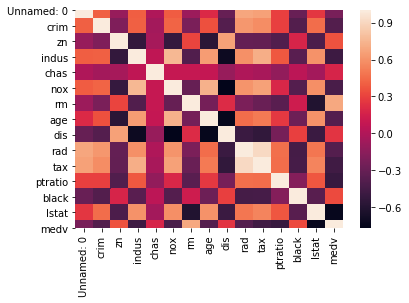

In [21]:
sns.heatmap(BOSTON.corr())

## Training a Linear Regression Model

### X and y arrays

In [23]:
x=BOSTON[[ 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat' ]]

In [62]:
y=BOSTON['medv']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

## Creating and Training the Model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [68]:
print(lm.intercept_)

40.21892901255082


In [72]:
lm.coef_


array([-8.85049752e-02,  5.02928536e-02,  2.03483110e-02,  3.75427054e+00,
       -1.77483714e+01,  3.24776492e+00,  1.20008182e-02, -1.40916141e+00,
        2.63880691e-01, -1.03440009e-02, -9.51780874e-01,  6.11600491e-03,
       -5.97133217e-01])

In [70]:
b=x.columns
b

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [74]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficients'])
coeff_df

,Coefficients
crim,-0.088505
zn,0.050293
indus,0.020348
chas,3.754271
nox,-17.748371
rm,3.247765
age,0.012001
dis,-1.409161
rad,0.263881
tax,-0.010344


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [44]:
predictions=lm.predict(x_test)

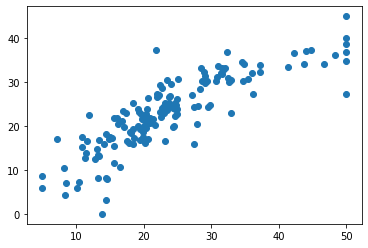

In [45]:
plt.scatter(y_test,predictions)

**Residual Histogram**

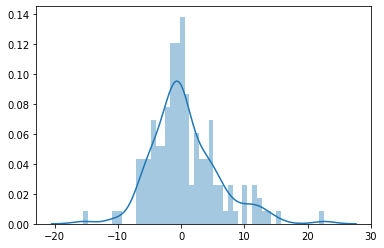

In [46]:
sns.distplot((y_test-predictions),bins=50)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.8356963614189263
MSE: 28.547585271468076
RMSE: 5.3429940362560835
